LAB ASSIGNMENT 3

Phoneme Segmentation and Voicing Analysis

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [15]:
import parselmouth
from parselmouth.praat import call

print("Parselmouth imported successfully!")

Parselmouth imported successfully!


Loading file

In [25]:
!ffmpeg -i /content/sample_data/audio_assignment_3.mp4 -ar 16000 -ac 1 output.wav


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Sampling Rate: 16000
Total Duration (seconds): 6.42
Total Samples: 102741


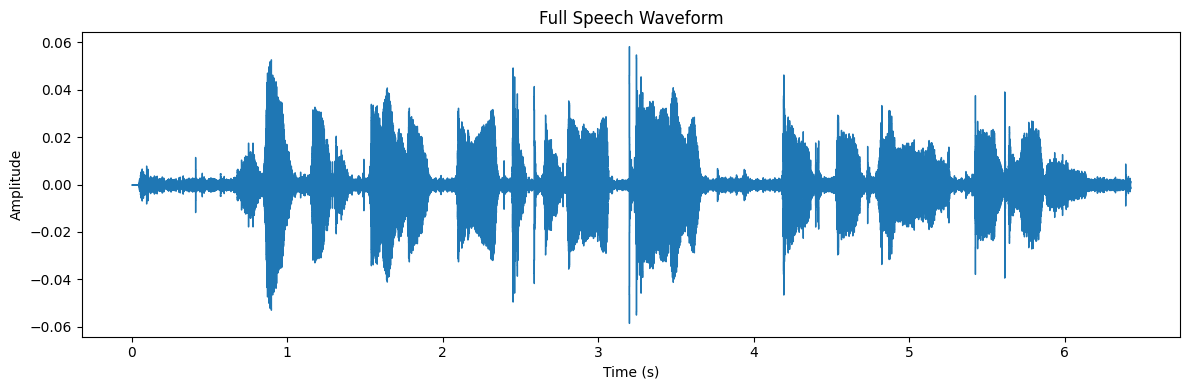

In [18]:
# Load recording (16kHz required)
file_path = "/content/sample_data/output.wav"
signal, sr = librosa.load(file_path, sr=16000)

print("Sampling Rate:", sr)
print("Total Duration (seconds):", round(len(signal)/sr,2))
print("Total Samples:", len(signal))

plt.figure(figsize=(12,4))
librosa.display.waveshow(signal, sr=sr)
plt.title("Full Speech Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

Automatic Segmentation (Silence Based)

In [19]:
# Split non-silent regions
intervals = librosa.effects.split(
    signal,
    top_db=25   # Silence threshold (adjust if needed)
)

print("Total Segments Detected:", len(intervals))

Total Segments Detected: 5


Extract & Plot Each Segment

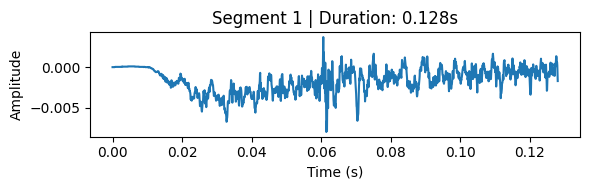

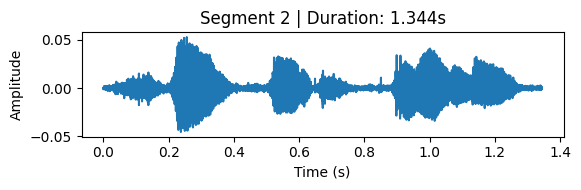

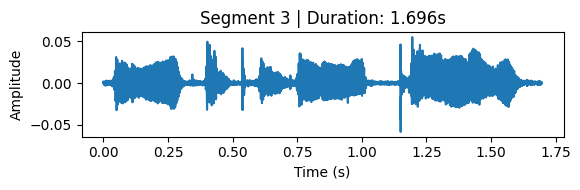

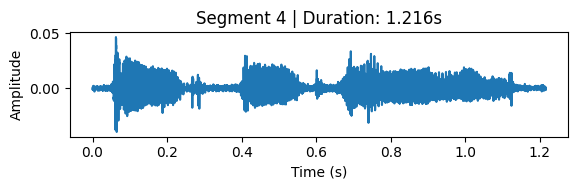

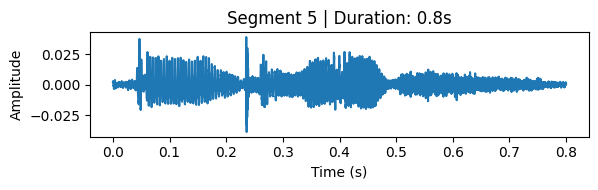

In [20]:
segments = []

for i, (start, end) in enumerate(intervals):
    segment = signal[start:end]
    segments.append(segment)

    duration = round((end - start)/sr, 3)

    plt.figure(figsize=(6,2))
    plt.plot(np.linspace(0, duration, len(segment)), segment)
    plt.title(f"Segment {i+1} | Duration: {duration}s")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

Voiced vs Unvoiced Classification

In [21]:
def classify_segment(x):
    zcr = np.mean(librosa.feature.zero_crossing_rate(x))
    energy = np.mean(x**2)

    if zcr < 0.1 and energy > 0.001:
        return "Voiced"
    else:
        return "Unvoiced"

print("----- Voicing Analysis -----")

for i, seg in enumerate(segments):
    result = classify_segment(seg)
    print(f"Segment {i+1} → {result}")

----- Voicing Analysis -----
Segment 1 → Unvoiced
Segment 2 → Unvoiced
Segment 3 → Unvoiced
Segment 4 → Unvoiced
Segment 5 → Unvoiced


Compare One Voiced & One Unvoiced

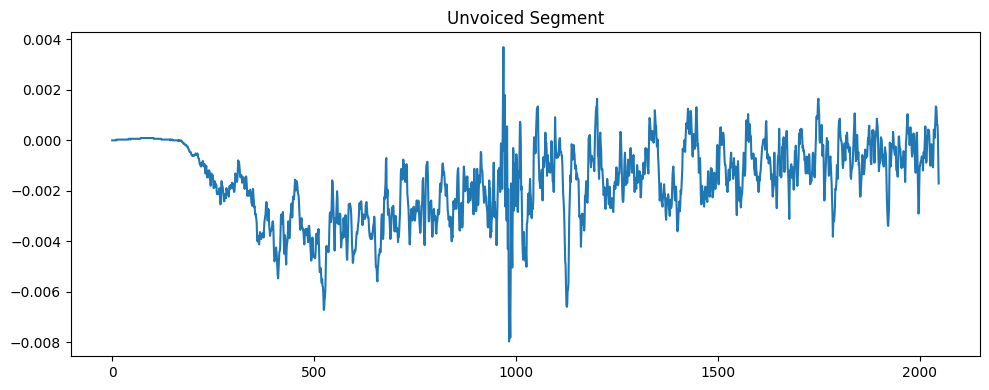

In [24]:
voiced_example = None
unvoiced_example = None

for seg in segments:
    label = classify_segment(seg)
    if label == "Voiced" and voiced_example is None:
        voiced_example = seg
    if label == "Unvoiced" and unvoiced_example is None:
        unvoiced_example = seg

plt.figure(figsize=(10,4))


plt.plot(unvoiced_example)
plt.title("Unvoiced Segment")

plt.tight_layout()
plt.show()